In [39]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
# print(iris.data[:,1:3])
X = iris.data[:, [2, 3]]
y = iris.target

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
sc = StandardScaler()


In [42]:
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [43]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn = ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Perceptron accuracy model: {accuracy_score} ")

Perceptron accuracy model: 0.9777777777777777 


In [45]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [46]:
accuracy_score = ppn.score(X_test_std, y_test)
print('Accuracy: %.2f' % accuracy_score)

Accuracy: 0.98


In [47]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx], marker=markers[idx], label=f'Class {cl}',edgecolor='black')
    if test_idx:
   # plot all examples
      X_test, y_test = X[test_idx, :], y[test_idx]

  plt.scatter(X_test[:, 0], X_test[:, 1],
  c='none', edgecolor='black', alpha=1.0,
  linewidth=1, marker='o',
  s=100, label='Test set')

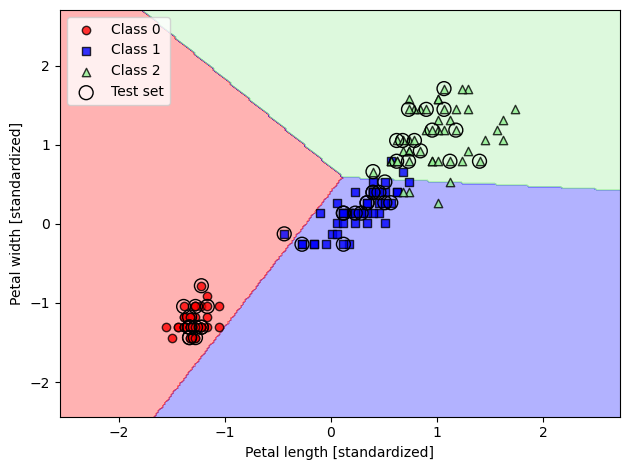

In [48]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn,test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Here we can see that we have classes like class 2 that fall in the category of class 1 <br>
We can see that these classes are not linearly separable by a straight line

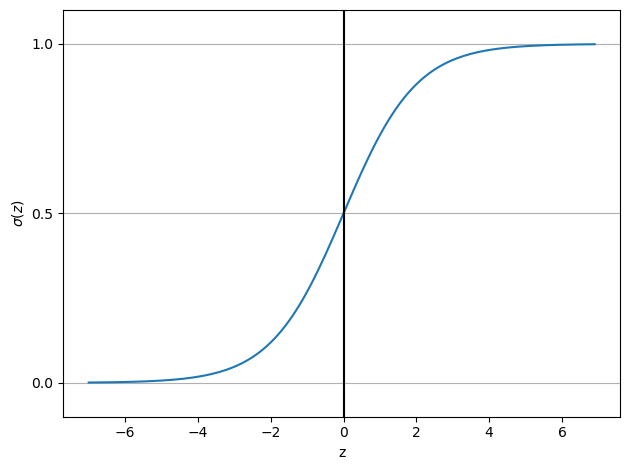

In [49]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

Now we are going to use scikit learns logistic regression model to identify the flowers


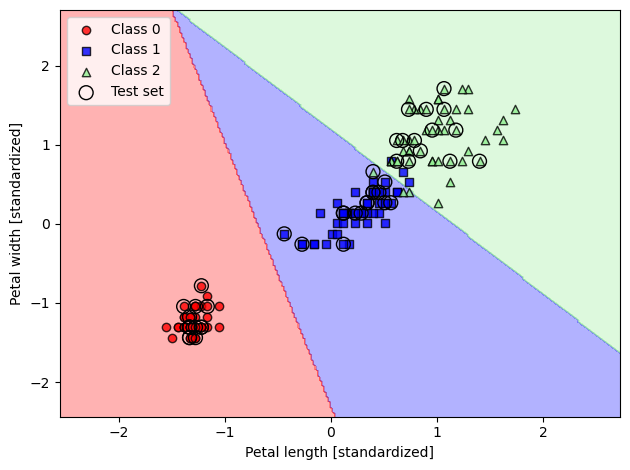

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [51]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [52]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

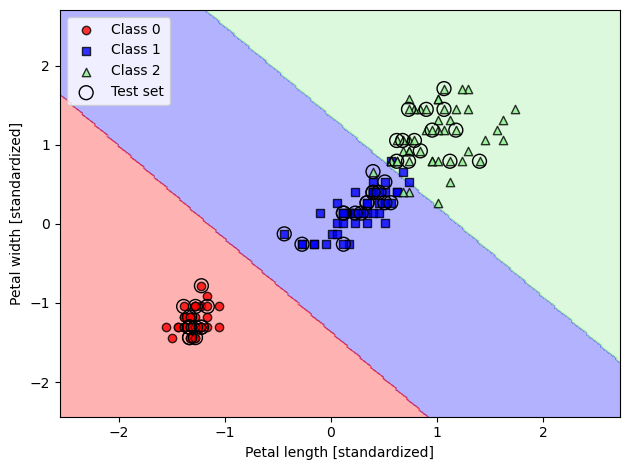

In [53]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [54]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

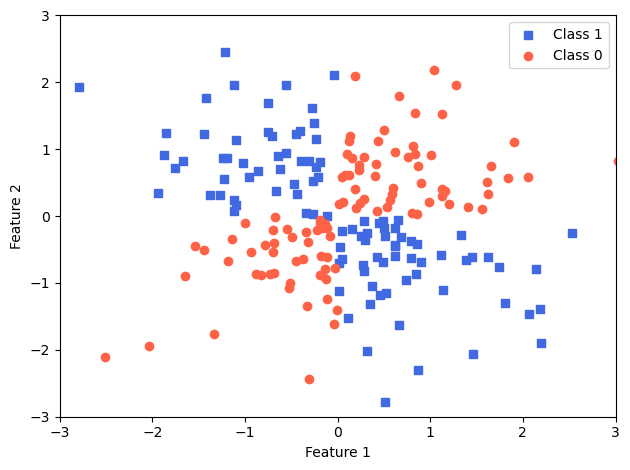

In [55]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1],c='royalblue', marker='s',label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],X_xor[y_xor == 0, 1],c='tomato', marker='o',label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

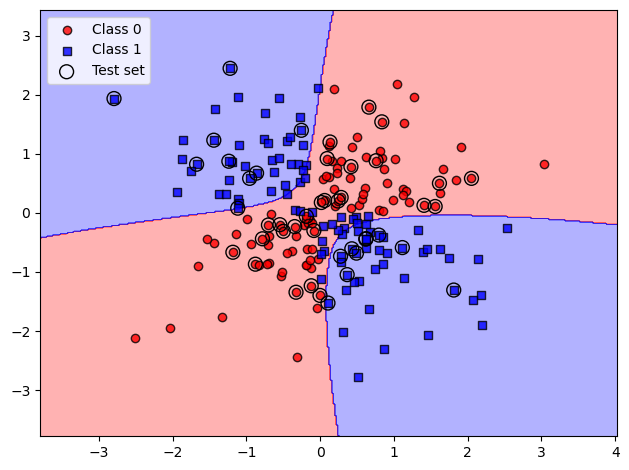

In [56]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm, test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

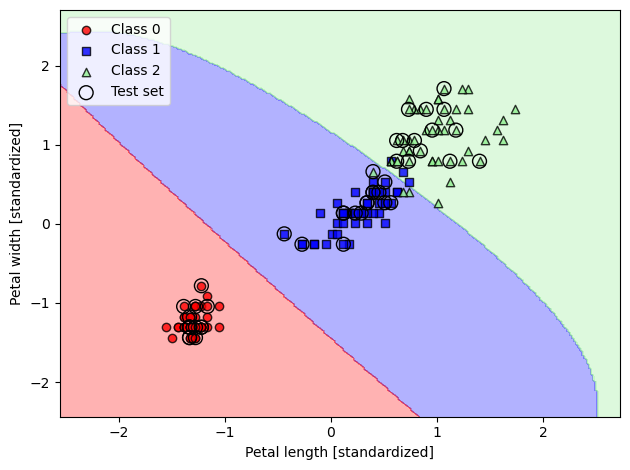

In [57]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

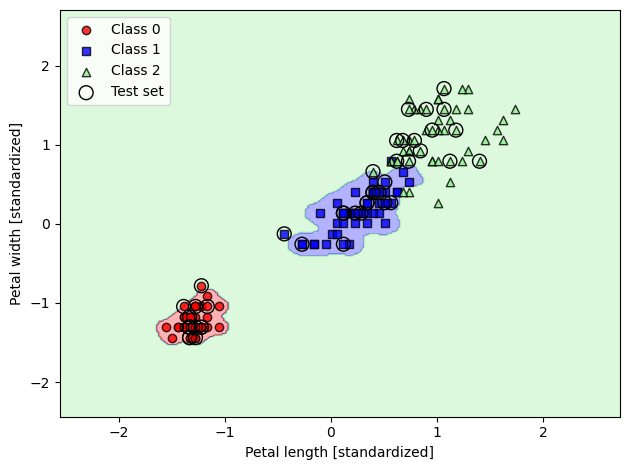

In [58]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()